## Plan
1. Prepare the data
2. Train and analyze a linear regression
- single input feature
- multiple input features
3. Train and analyze a polynomial regression
4. Train and analyze a decision tree model

### Prepare the data

In [1]:
# third cell -
import pandas as pd
import numpy as np

df = pd.read_csv("Gay_Travel_Index_2012-2021.csv", sep=",")
df = df[df['GDP'] < 89000000000]
#df = df[df['GDP'] > 89000000000]
#df = df[df['GDP'] < 5000000000000]

# Compute bmi based on height and weight metric units
# def bmi(height, weight):
#     return 10000*weight/(height**2)

#new_feature = bmi(howell_full['height'], howell_full['weight'])
#howell_full['bmi'] = new_feature
#howell_full.head(n=10)



### Plot data with a safety mask

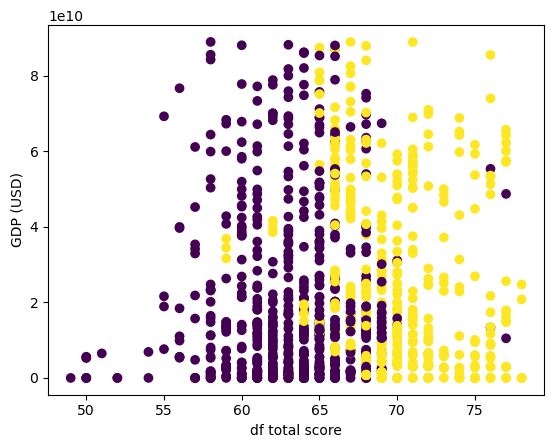

In [2]:
import matplotlib.pyplot as plt
year = df['Year']
product = df['GDP']
score = df['Score']
safe = df['Safe']
year >= 2015

#df['GDP'] = df['GDP'].astype(int)
df['Score'] = df['Score'].astype(float)

plt.scatter(score, product,c=safe)
plt.xlabel('df total score')
plt.ylabel('GDP (USD)')
#plt.legend(loc="upper left")
plt.show()


### Train/Test Data Split

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

#print('Total counts', df['CountryIndex'].value_counts())

#print('Train counts', train_set['CountryIndex'].value_counts())
#print('Test counts', test_set['CountryIndex'].value_counts())

Train size:  937 Test size:  235


### Train and evaluate a Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Score']]
y = train_set['GDP']
X_test = test_set[['Score']]
y_test = test_set['GDP']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  20517963063.5447
 Coefficients [8166300.78298756]
 Score 2.9903382401386125e-06
MAE is  19016781807.12248
RMSE is  23445356116.28188
MSE is  5.4968472341927605e+20
R^2  2.9903382401386125e-06

Results for linear regression on test data
MAE is  18162173962.687107
RMSE is  21992686933.830612
MSE is  4.8367827856948376e+20
R^2  0.0001290923378487463


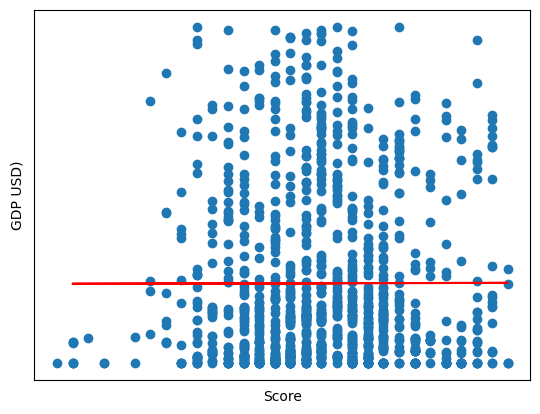

In [5]:
score = df['Score']
GDP = df['GDP']
# Plot outputs
plt.scatter(score, GDP)
plt.xlabel('Score')
plt.ylabel('GDP USD)')

plt.xticks(())
plt.yticks(())

plt.plot(X_test, y_test_pred, c='red')
plt.show()

### Train and evaluate a Linear Regression Model with a Feature

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Score', 'GDP']]
y = train_set['Safe']
X_test = test_set[['Score', 'GDP']]
y_test = test_set['Safe']

lrTwoInput = LinearRegression()
lrTwoInput.fit(X,y)

y_pred = lrTwoInput.predict(X)
print('Results for linear regression on training data')
print('Input: Score, GDP')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lrTwoInput.intercept_)
print(' Coefficients', lrTwoInput.coef_)
print(' Score', lrTwoInput.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lrTwoInput.predict(X_test)
print()
print('Results for linear regression on test data')
print('Input: Score, GDP')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Input: Score, GDP
 Default settings
Internal parameters:
 Bias is  -4.111154429436203
 Coefficients [6.83442762e-02 1.25540181e-12]
 Score 0.4725333676573633
MAE is  0.3050485768014225
RMSE is  0.3598886763396026
MSE is  0.12951985935747123
R^2  0.4725333676573633

Results for linear regression on test data
Input: Score, GDP
MAE is  0.30820335764399187
RMSE is  0.3643002620244731
MSE is  0.13271468091109972
R^2  0.4383779116233347


## Use Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
power = 2
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['Score']]
y = train_set['GDP']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Score']]
y_test = test_set['GDP']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  2
 Default settings
Internal parameters:
 Bias is  -147817958349.6724
 Coefficients [ 5.13813621e+09 -3.88622096e+07]
 Score 0.00359816457720441
MAE is  18976781308.037952
RMSE is  23403172971.896904
MSE is  5.477085051525258e+20
R^2  0.00359816457720441

Results for linear regression on test data
MAE is  18122302586.48692
RMSE is  21917802931.25535
MSE is  4.8039008533334557e+20
R^2  0.006926521334060576


### Polynomial Regress Graph

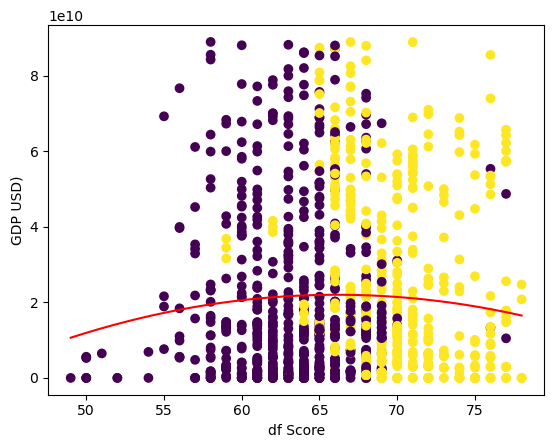

In [8]:
score = df['Score']
GDP = df['GDP']
safe = df['Safe']

plt.scatter(score, GDP, c=safe)
plt.xlabel('df Score')
plt.ylabel('GDP USD)')


min_score = score.min()
max_score = score.max()
points = 200
step_by = (max_score - min_score)/(points-1)

x_values = [min_score + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)

plt.plot(x_values, y_values, c='red')
plt.show()

## Decision Tree Classifier

Results for decision tree on training data
 Default settings
Confusion Matrix
[[531   0]
 [  8 398]]
Accuracy is  0.991462113127001
Precision is  1.0
Recall is  0.9802955665024631
F1 is  0.9900497512437811

Results for decision tree on test data
 Default settings
Confusion Matrix
[[132  13]
 [ 13  77]]
Accuracy is  0.8893617021276595
Precision is  0.8555555555555555
Recall is  0.8555555555555555
F1 is  0.8555555555555555


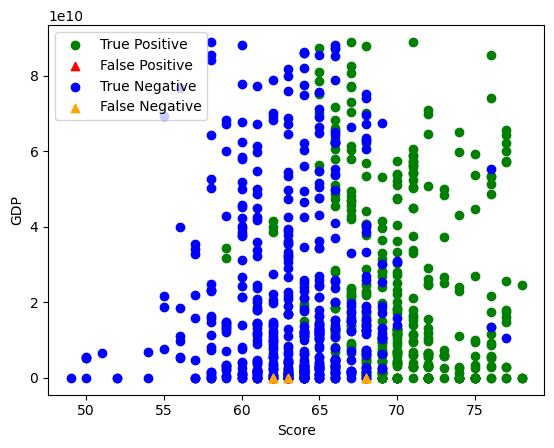

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X_DTC = train_set[['Score', 'GDP']]
y_DTC = train_set['Safe']
X_test_DTC = test_set[['Score', 'GDP']]
y_test_DTC = test_set['Safe']

tree_model_DTC = DecisionTreeClassifier()
tree_model_DTC.fit(X_DTC,y_DTC)

y_pred_DTC = tree_model_DTC.predict(X_DTC)
print('Results for decision tree on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_DTC, y_pred_DTC))
print('Accuracy is ', accuracy_score(y_DTC, y_pred_DTC))
print('Precision is ', precision_score(y_DTC, y_pred_DTC))
print('Recall is ', recall_score(y_DTC,y_pred_DTC))
print('F1 is ', f1_score(y_DTC, y_pred_DTC))
print()

y_test_pred_DTC = tree_model_DTC.predict(X_test_DTC)
print('Results for decision tree on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test_DTC, y_test_pred_DTC))
print('Accuracy is ', accuracy_score(y_test_DTC, y_test_pred_DTC))
print('Precision is ', precision_score(y_test_DTC, y_test_pred_DTC))
print('Recall is ', recall_score(y_test_DTC,y_test_pred_DTC))
print('F1 is ', f1_score(y_test_DTC, y_test_pred_DTC))

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

plot2FeatureBinaryConfusion(train_set, 'Score', 'GDP', 'Safe', y_pred_DTC)